In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np
import os, sys
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
# Make a reference to the books.csv file path
csvpathmouse = "/Users/patrickmurphy/Documents/Northwestern/Matplotlib/NUCHI201908DATA2-master/Homework/05-Matplotlib/Instructions/Pymaceuticals/data/clinicaltrial_data.csv"
csvpathclinical = "/Users/patrickmurphy/Documents/Northwestern/Matplotlib/NUCHI201908DATA2-master/Homework/05-Matplotlib/Instructions/Pymaceuticals/data/mouse_drug_data.csv"

# Read the Mouse Drug Data and the Clinical Trial Data
mf = pd.read_csv(csvpathmouse, encoding="ISO-8859-1")
cf= pd.read_csv(csvpathclinical, encoding="ISO-8859-1")

# Combine the data into a single dataset
df = pd.merge(mf,cf, on="Mouse ID")
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mtvcols = df[['Drug','Timepoint','Tumor Volume (mm3)']]
mtvcols.sort_values(by = ['Drug'])
mtv = mtvcols.groupby(["Drug","Timepoint"])[["Tumor Volume (mm3)"]].mean().reset_index()

# Convert to DataFrame
mtvdf = pd.DataFrame(mtv)

# Preview DataFrame
mtvdf.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
drugs = mtvdf.Drug.unique()
drug_data = [mtvdf.loc[mtvdf["Drug"] == drugs[x], ['Tumor Volume (mm3)']] for x in range(len(drugs))]

standard_errors = [sem(drug) for drug in drug_data]

# Convert to DataFrame
semdf = pd.DataFrame(standard_errors)
semdf["Drug"] = drugs
semdf = semdf.rename(columns={ 0 : "Standard Error"})

# Preview DataFrame
semdf

,Standard Error,Drug
0,0.970903,Capomulin
1,2.047757,Ceftamin
2,2.205969,Infubinol
3,2.671728,Ketapril
4,2.616691,Naftisol
5,2.479069,Placebo
6,2.220042,Propriva
7,1.031031,Ramicane
8,2.489156,Stelasyn
9,2.217328,Zoniferol


In [5]:
# Minor Data Munging to Re-Format the Data Frames
TimeArr = mtvdf.Timepoint.unique()

mundrg = pd.DataFrame(TimeArr)
mundrg = mundrg.rename(columns={ 0 : "Timepoint"})

mundrg[drugs[0]] = drug_data[0].to_numpy()
mundrg[drugs[1]] = drug_data[1].to_numpy()
mundrg[drugs[2]] = drug_data[2].to_numpy()
mundrg[drugs[3]] = drug_data[3].to_numpy()
mundrg[drugs[4]] = drug_data[4].to_numpy()
mundrg[drugs[5]] = drug_data[5].to_numpy()
mundrg[drugs[6]] = drug_data[6].to_numpy()
mundrg[drugs[7]] = drug_data[7].to_numpy()
mundrg[drugs[8]] = drug_data[8].to_numpy()
mundrg[drugs[9]] = drug_data[9].to_numpy()

# Preview that Reformatting worked
mundrg

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


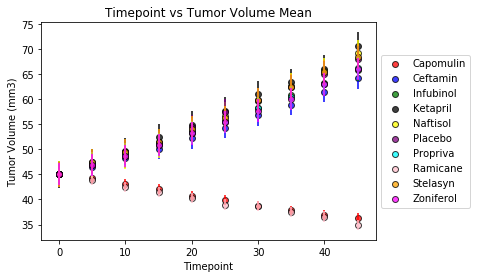

In [6]:
# Generate the Plot (with Error Bars)
plots = []
plots.append(plt.scatter(mundrg['Timepoint'], mundrg['Capomulin'], marker="o", facecolors="red", edgecolors="black", alpha=0.75))
plots.append(plt.errorbar(mundrg['Timepoint'],mundrg['Capomulin'],xerr=None, yerr=[standard_errors[0]]*len(mundrg['Timepoint']), ecolor='red',ls='none', label='_nolegend_'))
plots.append(plt.scatter(mundrg['Timepoint'], mundrg['Ceftamin'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75))
plots.append(plt.errorbar(mundrg['Timepoint'],mundrg['Ceftamin'],xerr=None,  yerr=[standard_errors[1]]*len(mundrg['Timepoint']), ecolor='blue',ls='none', label='_nolegend_'))
plots.append(plt.scatter(mundrg['Timepoint'], mundrg['Infubinol'], marker="o", facecolors="green", edgecolors="black", alpha=0.75))
plots.append(plt.errorbar(mundrg['Timepoint'],mundrg['Infubinol'],xerr=None, yerr=[standard_errors[2]]*len(mundrg['Timepoint']), ecolor='green',ls='none', label='_nolegend_'))
plots.append(plt.scatter(mundrg['Timepoint'], mundrg['Ketapril'], marker="o", facecolors="black", edgecolors="black", alpha=0.75))
plots.append(plt.errorbar(mundrg['Timepoint'],mundrg['Ketapril'],xerr=None, yerr=[standard_errors[3]]*len(mundrg['Timepoint']), ecolor='black',ls='none', label='_nolegend_'))
plots.append(plt.scatter(mundrg['Timepoint'], mundrg['Naftisol'], marker="o", facecolors="yellow", edgecolors="black", alpha=0.75))
plots.append(plt.errorbar(mundrg['Timepoint'],mundrg['Naftisol'],xerr=None, yerr=[standard_errors[4]]*len(mundrg['Timepoint']), ecolor='yellow',ls='none', label='_nolegend_'))
plots.append(plt.scatter(mundrg['Timepoint'], mundrg['Placebo'], marker="o", facecolors="purple", edgecolors="black", alpha=0.75))
plots.append(plt.errorbar(mundrg['Timepoint'],mundrg['Placebo'],xerr=None, yerr=[standard_errors[5]]*len(mundrg['Timepoint']), ecolor='purple',ls='none', label='_nolegend_'))
plots.append(plt.scatter(mundrg['Timepoint'], mundrg['Propriva'], marker="o", facecolors="cyan", edgecolors="black", alpha=0.75))
plots.append(plt.errorbar(mundrg['Timepoint'],mundrg['Propriva'],xerr=None, yerr=[standard_errors[6]]*len(mundrg['Timepoint']), ecolor='cyan',ls='none', label='_nolegend_'))
plots.append(plt.scatter(mundrg['Timepoint'], mundrg['Ramicane'], marker="o", facecolors="pink", edgecolors="black", alpha=0.75))
plots.append(plt.errorbar(mundrg['Timepoint'],mundrg['Ramicane'],xerr=None, yerr=[standard_errors[7]]*len(mundrg['Timepoint']), ecolor='pink',ls='none', label='_nolegend_'))
plots.append(plt.scatter(mundrg['Timepoint'], mundrg['Stelasyn'], marker="o", facecolors="orange", edgecolors="black", alpha=0.75))
plots.append(plt.errorbar(mundrg['Timepoint'],mundrg['Stelasyn'], xerr=None,yerr=[standard_errors[8]]*len(mundrg['Timepoint']), ecolor='orange',ls='none', label='_nolegend_'))
plots.append(plt.scatter(mundrg['Timepoint'], mundrg['Zoniferol'], marker="o", facecolors="magenta", edgecolors="black", alpha=0.75))
plots.append(plt.errorbar(mundrg['Timepoint'],mundrg['Zoniferol'],xerr=None, yerr=[standard_errors[9]]*len(mundrg['Timepoint']), ecolor='magenta',ls='none', label='_nolegend_'))
             
plt.title("Timepoint vs Tumor Volume Mean")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.rcParams["figure.figsize"] = [18,12]

# Save the Figure
plt.savefig("Timepoint_vs_Tumor_Volume.png")

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metcols = df[['Drug','Timepoint','Metastatic Sites']]
metcols.sort_values(by = ['Drug'])
met = metcols.groupby(["Drug","Timepoint"])[["Metastatic Sites"]].mean().reset_index()

# Convert to DataFrame
metdf = pd.DataFrame(met)

# Preview DataFrame
metdf.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_drug_data = [metdf.loc[metdf["Drug"] == drugs[x], ['Metastatic Sites']] for x in range(len(drugs))]

met_standard_errors = [sem(drug) for drug in met_drug_data]

# Convert to DataFrame
met_semdf = pd.DataFrame(met_standard_errors)
met_semdf["Drug"] = drugs
met_semdf = met_semdf.rename(columns={ 0 : "Standard Error"})

# Preview DataFrame
met_semdf

,Standard Error,Drug
0,0.165941,Capomulin
1,0.286729,Ceftamin
2,0.228098,Infubinol
3,0.349180,Ketapril
4,0.298297,Naftisol
5,0.357688,Placebo
6,0.306641,Propriva
7,0.136458,Ramicane
8,0.190307,Stelasyn
9,0.341369,Zoniferol


In [9]:
# Minor Data Munging to Re-Format the Data Frames
met_mundrg = pd.DataFrame(TimeArr)
met_mundrg = met_mundrg.rename(columns={ 0 : "Timepoint"})

# Why do I have to convert here when all the datatypes are the same????
met_mundrg[drugs[0]] = met_drug_data[0].to_numpy()
met_mundrg[drugs[1]] = met_drug_data[1].to_numpy()
met_mundrg[drugs[2]] = met_drug_data[2].to_numpy()
met_mundrg[drugs[3]] = met_drug_data[3].to_numpy()
met_mundrg[drugs[4]] = met_drug_data[4].to_numpy()
met_mundrg[drugs[5]] = met_drug_data[5].to_numpy()
met_mundrg[drugs[6]] = met_drug_data[6].to_numpy()
met_mundrg[drugs[7]] = met_drug_data[7].to_numpy()
met_mundrg[drugs[8]] = met_drug_data[8].to_numpy()
met_mundrg[drugs[9]] = met_drug_data[9].to_numpy()

# Preview that Reformatting worked
met_mundrg

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
5,25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
6,30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
7,35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
8,40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714
9,45,1.476190,2.692308,2.111111,3.363636,2.538462,3.272727,2.571429,1.250000,1.727273,3.071429


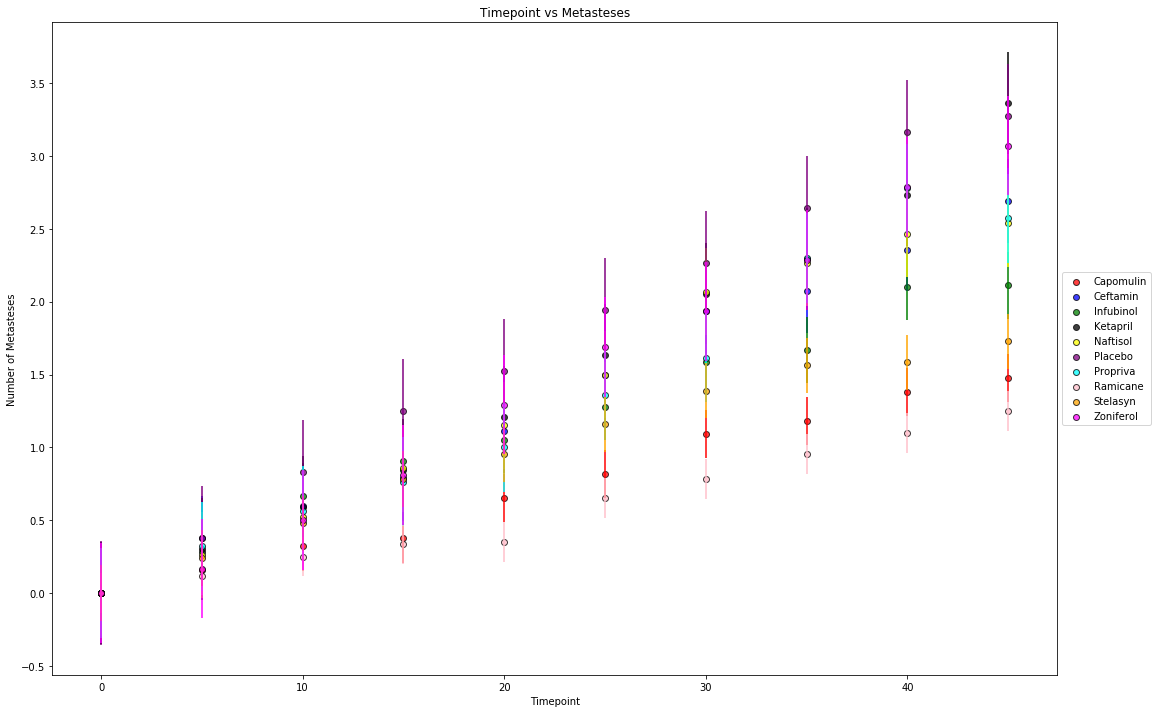

In [10]:
# Generate the Plot (with Error Bars)
met_plots = []
met_plots.append(plt.scatter(met_mundrg['Timepoint'], met_mundrg['Capomulin'], marker="o", facecolors="red", edgecolors="black", alpha=0.75))
met_plots.append(plt.errorbar(met_mundrg['Timepoint'],met_mundrg['Capomulin'],xerr=None, yerr=[met_standard_errors[0]]*len(mundrg['Timepoint']), ecolor='red',ls='none', label='_nolegend_'))
met_plots.append(plt.scatter(met_mundrg['Timepoint'], met_mundrg['Ceftamin'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75))
met_plots.append(plt.errorbar(met_mundrg['Timepoint'],met_mundrg['Ceftamin'],xerr=None, yerr=[met_standard_errors[1]]*len(mundrg['Timepoint']), ecolor='blue',ls='none', label='_nolegend_'))
met_plots.append(plt.scatter(met_mundrg['Timepoint'], met_mundrg['Infubinol'], marker="o", facecolors="green", edgecolors="black", alpha=0.75))
met_plots.append(plt.errorbar(met_mundrg['Timepoint'],met_mundrg['Infubinol'],xerr=None, yerr=[met_standard_errors[2]]*len(mundrg['Timepoint']), ecolor='green',ls='none', label='_nolegend_'))
met_plots.append(plt.scatter(met_mundrg['Timepoint'], met_mundrg['Ketapril'], marker="o", facecolors="black", edgecolors="black", alpha=0.75))
met_plots.append(plt.errorbar(met_mundrg['Timepoint'],met_mundrg['Ketapril'],xerr=None, yerr=[met_standard_errors[3]]*len(mundrg['Timepoint']), ecolor='black',ls='none', label='_nolegend_'))
met_plots.append(plt.scatter(met_mundrg['Timepoint'], met_mundrg['Naftisol'], marker="o", facecolors="yellow", edgecolors="black", alpha=0.75))
met_plots.append(plt.errorbar(met_mundrg['Timepoint'],met_mundrg['Naftisol'],xerr=None, yerr=[met_standard_errors[4]]*len(mundrg['Timepoint']), ecolor='yellow',ls='none', label='_nolegend_'))
met_plots.append(plt.scatter(met_mundrg['Timepoint'], met_mundrg['Placebo'], marker="o", facecolors="purple", edgecolors="black", alpha=0.75))
met_plots.append(plt.errorbar(met_mundrg['Timepoint'],met_mundrg['Placebo'],xerr=None, yerr=[met_standard_errors[5]]*len(mundrg['Timepoint']), ecolor='purple',ls='none', label='_nolegend_'))
met_plots.append(plt.scatter(met_mundrg['Timepoint'], met_mundrg['Propriva'], marker="o", facecolors="cyan", edgecolors="black", alpha=0.75))
met_plots.append(plt.errorbar(met_mundrg['Timepoint'],met_mundrg['Propriva'],xerr=None, yerr=[met_standard_errors[6]]*len(mundrg['Timepoint']), ecolor='cyan',ls='none', label='_nolegend_'))
met_plots.append(plt.scatter(met_mundrg['Timepoint'], met_mundrg['Ramicane'], marker="o", facecolors="pink", edgecolors="black", alpha=0.75))
met_plots.append(plt.errorbar(met_mundrg['Timepoint'],met_mundrg['Ramicane'],xerr=None, yerr=[met_standard_errors[7]]*len(mundrg['Timepoint']), ecolor='pink',ls='none', label='_nolegend_'))
met_plots.append(plt.scatter(met_mundrg['Timepoint'], met_mundrg['Stelasyn'], marker="o", facecolors="orange", edgecolors="black", alpha=0.75))
met_plots.append(plt.errorbar(met_mundrg['Timepoint'],met_mundrg['Stelasyn'],xerr=None, yerr=[met_standard_errors[8]]*len(mundrg['Timepoint']), ecolor='orange',ls='none', label='_nolegend_'))
met_plots.append(plt.scatter(met_mundrg['Timepoint'], met_mundrg['Zoniferol'], marker="o", facecolors="magenta", edgecolors="black", alpha=0.75))
met_plots.append(plt.errorbar(met_mundrg['Timepoint'],met_mundrg['Zoniferol'],xerr=None, yerr=[met_standard_errors[9]]*len(mundrg['Timepoint']), ecolor='magenta',ls='none', label='_nolegend_'))

plt.title("Timepoint vs Metasteses")
plt.xlabel("Timepoint")
plt.ylabel("Number of Metasteses")
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.rcParams["figure.figsize"] = [18,12]

# Save the Figure
plt.savefig("Timepoint_vs_Metasteses.png")

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
surcols = df[['Drug','Timepoint']]
surcols["Survivors"] = np.ones(len(surcols["Drug"]))
surcols.sort_values(by = ['Drug'])
sur = surcols.groupby(["Drug","Timepoint"])[["Survivors"]].sum().reset_index()

# Convert to DataFrame
surdf = pd.DataFrame(sur)

# Preview DataFrame
surdf.head()


,Drug,Timepoint,Survivors
0,Capomulin,0,25.0
1,Capomulin,5,25.0
2,Capomulin,10,25.0
3,Capomulin,15,24.0
4,Capomulin,20,23.0


In [12]:
# Minor Data Munging to Re-Format the Data Frames
sur_drug_data = [surdf.loc[surdf["Drug"] == drugs[x], ['Survivors']] for x in range(len(drugs))]

sur_mundrg = pd.DataFrame(TimeArr)
sur_mundrg = met_mundrg.rename(columns={ 0 : "Timepoint"})

# Why do I have to convert here when all the datatypes are the same????
sur_mundrg[drugs[0]] = ((sur_drug_data[0].to_numpy())/(max(sur_drug_data[0].to_numpy())))*100
sur_mundrg[drugs[1]] = ((sur_drug_data[1].to_numpy())/(max(sur_drug_data[1].to_numpy())))*100
sur_mundrg[drugs[2]] = ((sur_drug_data[2].to_numpy())/(max(sur_drug_data[2].to_numpy())))*100
sur_mundrg[drugs[3]] = ((sur_drug_data[3].to_numpy())/(max(sur_drug_data[3].to_numpy())))*100
sur_mundrg[drugs[4]] = ((sur_drug_data[4].to_numpy())/(max(sur_drug_data[4].to_numpy())))*100
sur_mundrg[drugs[5]] = ((sur_drug_data[5].to_numpy())/(max(sur_drug_data[5].to_numpy())))*100
sur_mundrg[drugs[6]] = ((sur_drug_data[6].to_numpy())/(max(sur_drug_data[6].to_numpy())))*100
sur_mundrg[drugs[7]] = ((sur_drug_data[7].to_numpy())/(max(sur_drug_data[7].to_numpy())))*100
sur_mundrg[drugs[8]] = ((sur_drug_data[8].to_numpy())/(max(sur_drug_data[8].to_numpy())))*100
sur_mundrg[drugs[9]] = ((sur_drug_data[9].to_numpy())/(max(sur_drug_data[9].to_numpy())))*100

# Preview that Reformatting worked
sur_mundrg


,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
1,5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
2,10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
3,15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
4,20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
5,25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
6,30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
7,35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
8,40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0
9,45,84.0,52.0,36.0,44.0,52.0,44.0,26.923077,80.0,42.307692,56.0


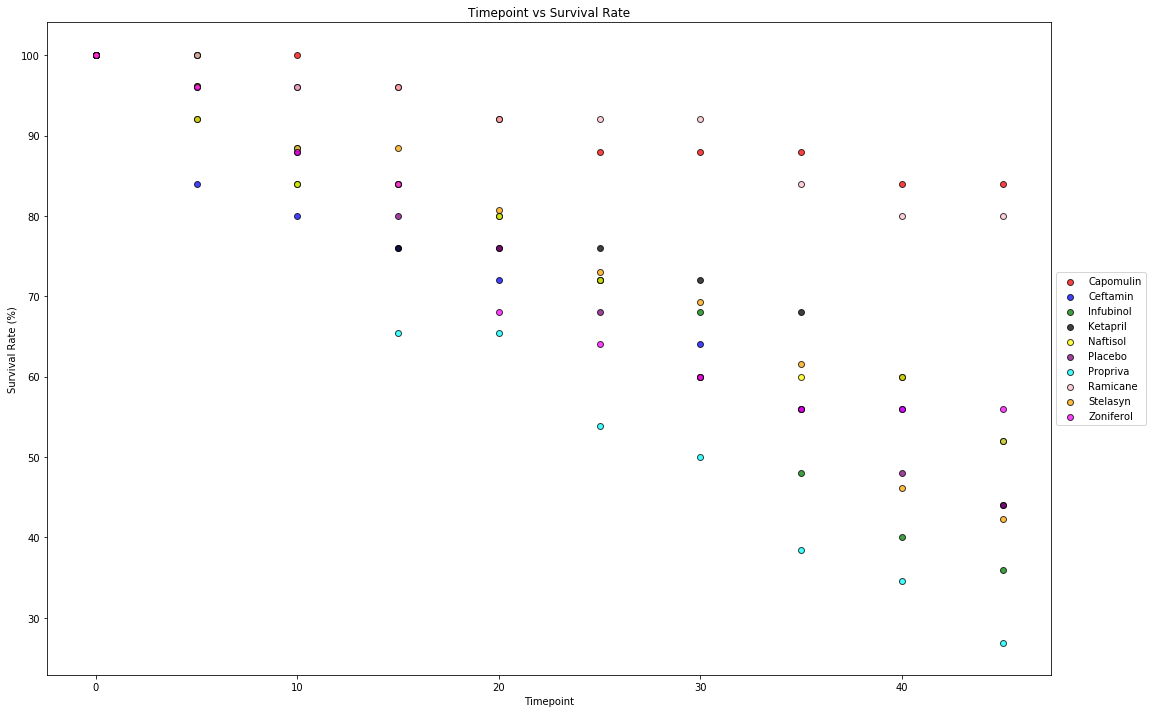

In [13]:
# Generate the Plot (Accounting for percentages)
sur_plots = []
sur_plots.append(plt.scatter(sur_mundrg['Timepoint'], sur_mundrg['Capomulin'], marker="o", facecolors="red", edgecolors="black", alpha=0.75))
sur_plots.append(plt.scatter(sur_mundrg['Timepoint'], sur_mundrg['Ceftamin'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75))
sur_plots.append(plt.scatter(sur_mundrg['Timepoint'], sur_mundrg['Infubinol'], marker="o", facecolors="green", edgecolors="black", alpha=0.75))
sur_plots.append(plt.scatter(sur_mundrg['Timepoint'], sur_mundrg['Ketapril'], marker="o", facecolors="black", edgecolors="black", alpha=0.75))
sur_plots.append(plt.scatter(sur_mundrg['Timepoint'], sur_mundrg['Naftisol'], marker="o", facecolors="yellow", edgecolors="black", alpha=0.75))
sur_plots.append(plt.scatter(sur_mundrg['Timepoint'], sur_mundrg['Placebo'], marker="o", facecolors="purple", edgecolors="black", alpha=0.75))
sur_plots.append(plt.scatter(sur_mundrg['Timepoint'], sur_mundrg['Propriva'], marker="o", facecolors="cyan", edgecolors="black", alpha=0.75))
sur_plots.append(plt.scatter(sur_mundrg['Timepoint'], sur_mundrg['Ramicane'], marker="o", facecolors="pink", edgecolors="black", alpha=0.75))
sur_plots.append(plt.scatter(sur_mundrg['Timepoint'], sur_mundrg['Stelasyn'], marker="o", facecolors="orange", edgecolors="black", alpha=0.75))
sur_plots.append(plt.scatter(sur_mundrg['Timepoint'], sur_mundrg['Zoniferol'], marker="o", facecolors="magenta", edgecolors="black", alpha=0.75))

plt.title("Timepoint vs Survival Rate")
plt.xlabel("Timepoint")
plt.ylabel("Survival Rate (%)")
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')

# Save the Figure
plt.savefig("Timepoint_vs_Survival_Rate.png")


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
perchange = []

for x in drugs:
    perchange.append(mundrg[x][0]-mundrg[x][9])

perchange = np.around(perchange)

perdf = pd.DataFrame(drugs)
perdf = perdf.rename(columns={ 0 : "Drug"})
perdf["Size Change  (%)"] = perchange

# Display the data to confirm
perdf

,Drug,Size Change (%)
0,Capomulin,9.0
1,Ceftamin,-19.0
2,Infubinol,-21.0
3,Ketapril,-26.0
4,Naftisol,-24.0
5,Placebo,-23.0
6,Propriva,-21.0
7,Ramicane,10.0
8,Stelasyn,-23.0
9,Zoniferol,-21.0


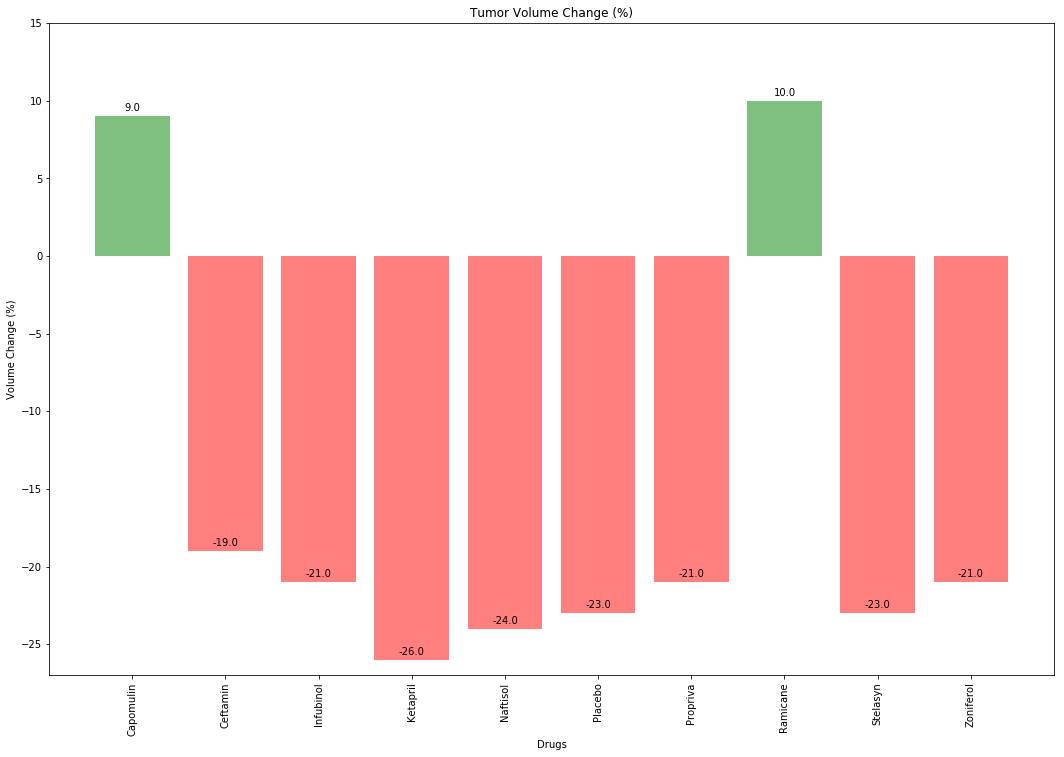

In [15]:
# Plot Figure
x_axis = np.arange(len(perdf["Size Change  (%)"]))
fig, ax = plt.subplots()
tumbar = ax.bar(x_axis, perdf["Size Change  (%)"], color=['green','red','red','red','red','red','red','green','red','red'], alpha=0.5, align="center")

# Create the ticks for our bar chart's x axis 
tick_locations = [value for value in x_axis]

# Orient widths. Add labels, tick marks, etc. 
plt.xticks(tick_locations,drugs,rotation="vertical")
plt.ylim(round(min(perdf["Size Change  (%)"])-1), round(max(perdf["Size Change  (%)"])+5))
plt.title("Tumor Volume Change (%)")
plt.xlabel("Drugs")
plt.ylabel("Volume Change (%)")

# Use functions to label the percentages of changes

def autolabel(tumbar, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in tumbar:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

autolabel(tumbar)
plt.rcParams["figure.figsize"] = [18,12]
# Save the Figure
plt.savefig("Drug_Tumor_Volume_Change(%).png")

# Show the Figure
plt.show()